In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
Heart_decease_df = pd.read_csv(r"C:\Users\MiniNico\Desktop\Datasets\Heart_attack_predictor\heart.csv")

In [3]:

heart_disease_target = Heart_decease_df[['HeartDisease']]
Heart_decease_df = Heart_decease_df.drop(columns=['HeartDisease'])


In [4]:
Columnas_numericas =([col for col in Heart_decease_df.columns if Heart_decease_df[col].dtype in ['int64', 'float64']])
Columnas_categoricas =([col for col in Heart_decease_df.columns if Heart_decease_df[col].dtype not in ['int64', 'float64']])

In [5]:
Heart_decease_df["Cholesterol"] = Heart_decease_df["Cholesterol"].replace(0, Heart_decease_df["Cholesterol"].mean())
Heart_decease_df.drop(index=449, inplace=True)

In [6]:

from scipy.stats import zscore
# Calcula el Z-score en las columnas numéricas
Heart_decease_df[Columnas_numericas] = Heart_decease_df[Columnas_numericas].apply(zscore)


umbral_z = 3 
Heart_decease_df = Heart_decease_df[(Heart_decease_df[Columnas_numericas].abs() < umbral_z).all(axis=1)]

heart_disease_target = heart_disease_target.loc[Heart_decease_df.index]

Resultado regression logistica primer modelo: 0.8532608695652174

Cambios: Get dummies en categoricas y standart scaler en numericas

Resultado regression logisitca segundo modelo: 0.8914

Cambios: Remplazo de valores equivocados y eliminacon de outliers

Resultado regression logisitca segundo modelo: 0.8933

Cambios: Remplazo de valores equivocados solo en cholesterol y eliminacon de outliers

Resultado regression logisitca segundo modelo: 0.8580

Cambios: Se aplica validacion cruzada y searchgrid con los parametros de regression logistica

c:\Users\MiniNico\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
c:\Users\MiniNico\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


Número de componentes que explican el 95% de la varianza: 11


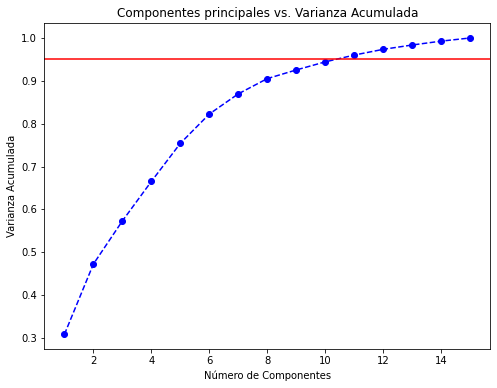

In [7]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = pd.get_dummies(Heart_decease_df, columns=Columnas_categoricas, drop_first=True)
y = heart_disease_target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train.loc[: ,Columnas_numericas] = scaler.fit_transform(X_train[Columnas_numericas])
X_test.loc[:, Columnas_numericas] = scaler.transform(X_test[Columnas_numericas])

pca = PCA()
X_train_pca = pca.fit_transform(X_train)

varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)

num_componentes_95 = np.argmax(varianza_acumulada >= 0.95) + 1

print(f'Número de componentes que explican el 95% de la varianza: {num_componentes_95}')


plt.figure(figsize=(8, 6))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', linestyle='--', color='b')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada')
plt.title('Componentes principales vs. Varianza Acumulada')
plt.show()



In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01,0.1,0.5,1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga', 'newton-cg', 'sag'],
    'max_iter': [10,20,30,40, 100, 150, 200, 300]
}

logreg = LogisticRegression()

grid_search = GridSearchCV(logreg, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Mejores hiperparámetros: {best_params}')
print(f'Mejor precisión en validación cruzada: {best_score:.4f}')


best_logreg = grid_search.best_estimator_
y_pred = best_logreg.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión en el conjunto de prueba: {test_accuracy:.4f}')

Mejores hiperparámetros: {'C': 0.5, 'max_iter': 20, 'penalty': 'l1', 'solver': 'saga'}
Mejor precisión en validación cruzada: 0.8580
Precisión en el conjunto de prueba: 0.8989


c:\Users\MiniNico\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan 0.77666275 0.54915884        nan        nan 0.8356025
 0.8356025  0.83419405 0.8356025  0.83419405        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan 0.77666275 0.54915884        nan
        nan 0.8356025  0.8356025  0.8356025  0.8356025  0.8356025
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan 0.77666275
 0.54915884        nan        nan 0.8356025  0.8356025  0.8356025
 0.8356025  0.8356025         nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan 0.77666275 0.54915884        nan        nan 0.8356025
 0.8356025  0.8356025  0.8356025  0.8356025         nan        nan
        nan        nan   

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier



scaler = MinMaxScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[Columnas_numericas] = scaler.fit_transform(X_train[Columnas_numericas])
X_test_scaled[Columnas_numericas] = scaler.transform(X_test[Columnas_numericas])


pca = PCA(n_components=11)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


model1 = LogisticRegression(C=0.1, max_iter=100, penalty='l1', solver='saga')
model2 = KNeighborsClassifier(n_neighbors=32)
model3 = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

meta_model = LogisticRegression()


stacking_clf = StackingClassifier(
    estimators=[('lr', model1), ('rf', model2), ('xgb', model3)],
    final_estimator=meta_model
)


cv_scores = cross_val_score(stacking_clf, X_train_pca, y_train, cv=5, scoring='accuracy')


stacking_clf.fit(X_train_pca, y_train)


y_pred = stacking_clf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)


print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Accuracy: {cv_scores.mean():.4f}')
print(f'Final Test Accuracy: {accuracy:.4f}')


c:\Users\MiniNico\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\MiniNico\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\MiniNico\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\MiniNico\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarnin

Cross-Validation Scores: [0.87412587 0.86713287 0.8028169  0.83098592 0.82394366]
Mean CV Accuracy: 0.8398
Final Test Accuracy: 0.8876
